# PS8

Tyler Amos

MACSS 30100

March 12 2018

# (a)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/master/ProblemSets/PS8/data/strongdrink.txt')
                 
                 

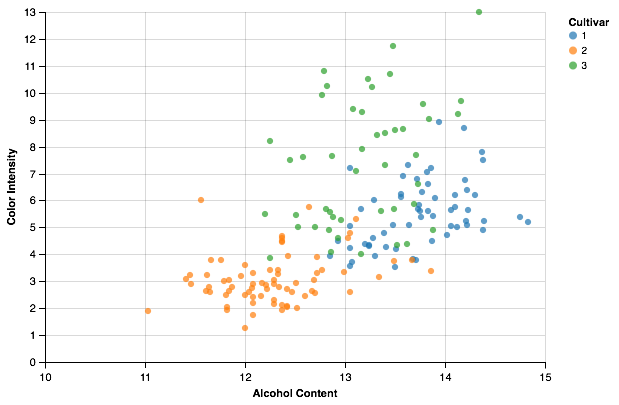

In [4]:
# you may need to install altair: https://altair-viz.github.io/installation.html

# and run the command below in the terminal to reproduce this plot

#jupyter nbextension enable vega --py --sys-prefix

df_plot = df.copy()

df_plot['Cultivar'] = df['cultivar'].astype('category')

alt.Chart(title = 'C', data = df_plot).mark_circle().encode(
    x=alt.X('alco', axis=alt.Axis( title='Alcohol Content'),
            scale=alt.Scale(domain=(10, 15))),
    y=alt.Y('color_int', axis=alt.Axis(title='Color Intensity')),
    color = 'Cultivar')

# (b)

In [38]:
df_b = df.copy()
df_b = df_b[df_b['cultivar'] != 3]
x_data = df_b[['alco', 'malic', 'tot_phen', 'color_int']]
x_data['constant'] = 1 # Add constant
x_data = x_data.values
y_data = np.ravel(df_b['cultivar'])
kf = KFold(n_splits = 4, shuffle = True, random_state = 22)

def task_b(solver, C_val, penalty_val):
    MSE_vec_kf = []
    for train_id, test_id in kf.split(x_data):
        x_train, x_test = x_data[train_id], x_data[test_id]
        y_train, y_test = y_data[train_id], y_data[test_id]
        multi_log = LogisticRegression(multi_class = 'multinomial',
                                       solver = solver, C = C_val, penalty = penalty_val)
        multi_log.fit(x_train, y_train)
        y_pred = multi_log.predict(x_test)
        MSE_vec_kf.append(((y_test - y_pred) ** 2).mean())
    print("SOLVER: {}, C: {}, PENALTY {}, \n MSE {}\n".format(solver, C_val,
                                                            penalty_val, 
                                                            np.mean(MSE_vec_kf)
                                                          ))

for i in range(1, 10):
    task_b('newton-cg', i, 'l2')

print("MSE reaches a minimum after C = 3")


for i in range(1, 10):
    task_b('saga', i, 'l1')

print("MSE again reaches a minimum after C = 3")



/anaconda3/envs/persp_model_18/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


SOLVER: newton-cg, C: 1, PENALTY l2, 
 MSE 0.11482007575757576

SOLVER: newton-cg, C: 2, PENALTY l2, 
 MSE 0.11482007575757576

SOLVER: newton-cg, C: 3, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 4, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 5, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 6, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 7, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 8, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 9, PENALTY l2, 
 MSE 0.10724431818181818

MSE reaches a minimum after C = 3
SOLVER: saga, C: 1, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 2, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 3, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 4, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 5, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 6, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 7, PENALTY l1, 
 MSE 0.13

/anaconda3/envs/persp_model_18/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# (c)

# (d)

# (e)

# (f)